<a href="https://colab.research.google.com/github/agupta35/DeepLearning/blob/master/StockPriceAAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import tensorflow as tf

%matplotlib inline
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

# get gpu
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:

#load dataset
dataset = pd.read_csv('AAPL.csv')
dataset.rename(columns={'Adj Close':'Adjclose'},inplace=True)
dataset['Date'] = pd.to_datetime(dataset['Date']) # Convert to timeseries data
dataset.head()

,Date,Open,High,Low,Close,Adjclose,Volume
0,2014-10-20,98.320000,99.959999,98.220001,99.760002,91.539482,77517300
1,2014-10-21,103.019997,103.019997,101.269997,102.470001,94.026176,94623900
2,2014-10-22,102.839996,104.110001,102.599998,102.989998,94.503311,68263100
3,2014-10-23,104.080002,105.050003,103.629997,104.830002,96.191689,71074700
4,2014-10-24,105.180000,105.489998,104.529999,105.220001,96.549545,47053900


# Data Visualization: Plot the feature dimensions (open, high, low, etc.) against date to display the data characteristics and describe your detailed observations.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


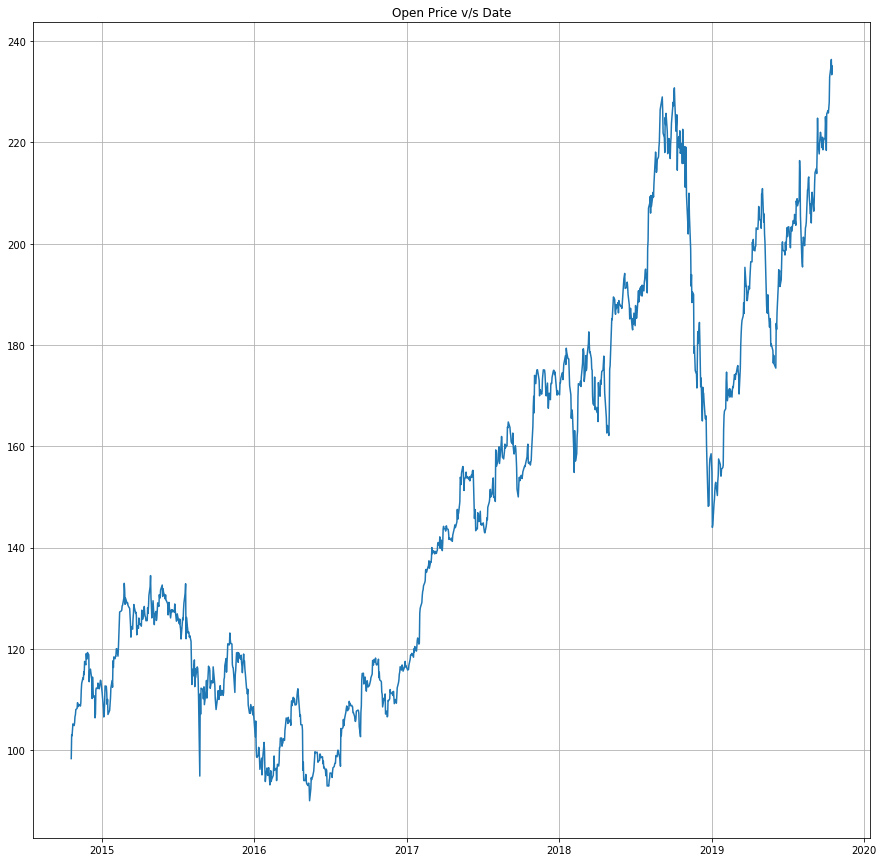

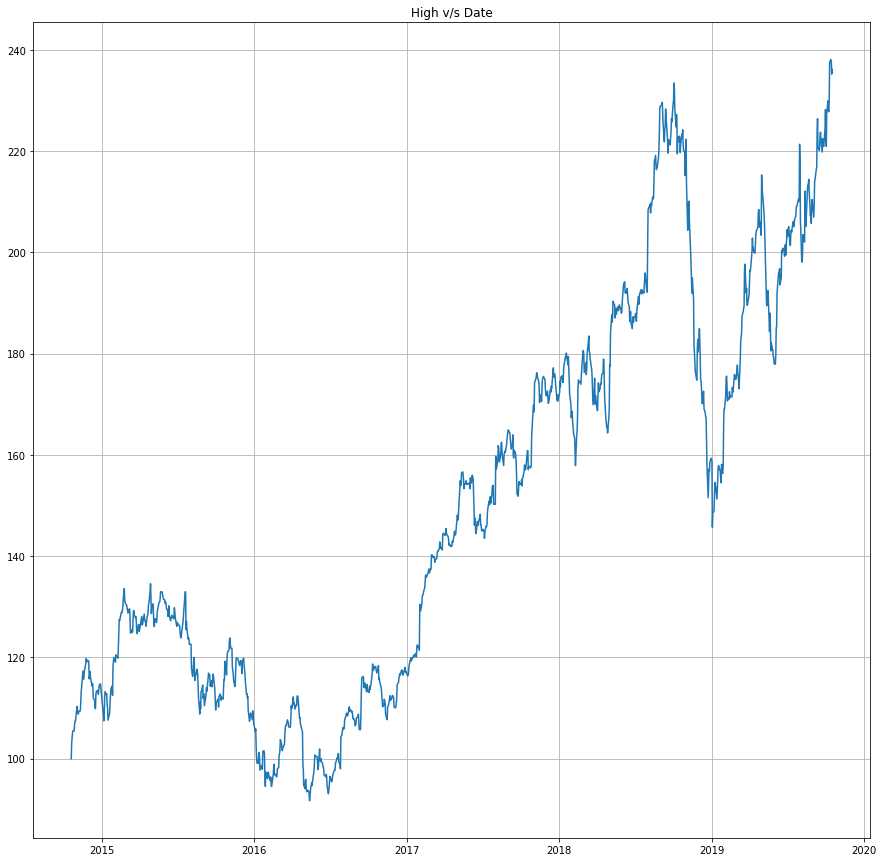

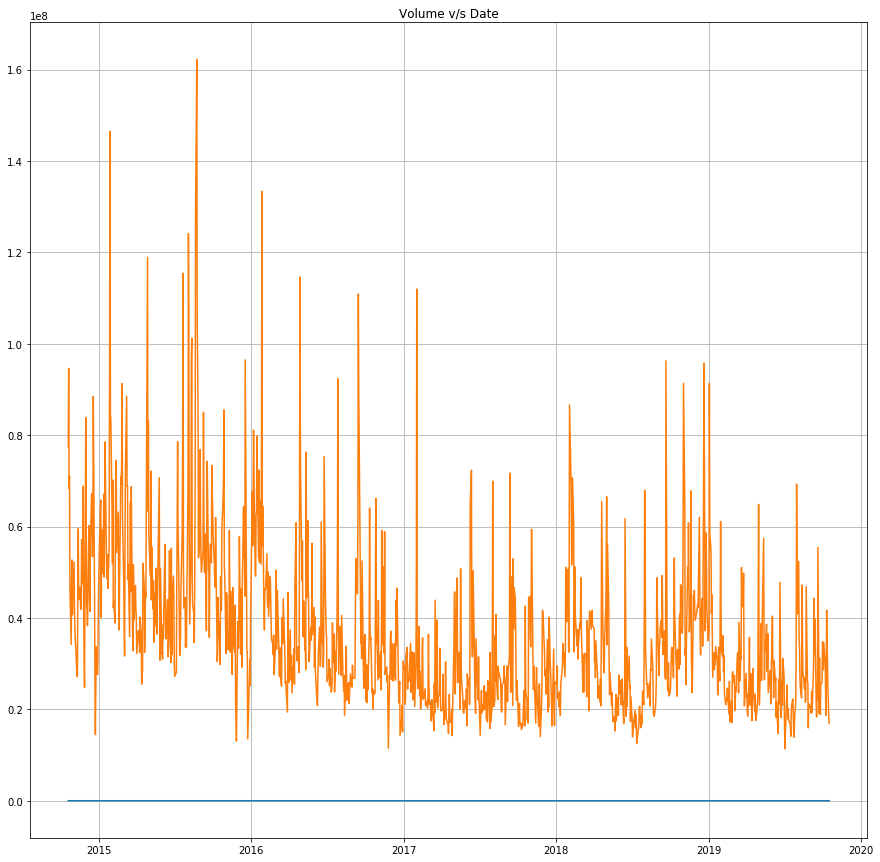

In [3]:
plt.figure(figsize=(15, 15))
plt.plot(dataset.Date,dataset.Open)
plt.title('Open Price v/s Date')
plt.grid(True)
plt.figure(figsize=(15, 15))
plt.plot(dataset.Date,dataset.High)
plt.title('High v/s Date')
plt.grid(True)
plt.figure(figsize=(15, 15))
plt.plot(dataset.Date,dataset.Low)
plt.title('Low v/s Date')
plt.grid(True)
plt.plot(dataset.Date,dataset.Volume)
plt.title('Volume v/s Date')
plt.grid(True)

#Data Normalization: As a rule of thumb, whenever you use a neural network, you should normalize or scale your data to scale our data between 0 and 1. Hint: sklearn.preprocessing library has some scaling functions for this job

In [11]:
#We will only consider only open price for now
open_array = dataset['Open'].values #returns a numpy array
open_array=open_array.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
open_scaled = min_max_scaler.fit_transform(open_array)
dataset.insert(loc=7,column='Open_Norm',value=open_scaled, allow_duplicates=True)
dataset.head()


,Date,Open,High,Low,Close,Adjclose,Volume,Open_Norm
0,2014-10-20,98.320000,99.959999,98.220001,99.760002,91.539482,77517300,0.056834
1,2014-10-21,103.019997,103.019997,101.269997,102.470001,94.026176,94623900,0.088940
2,2014-10-22,102.839996,104.110001,102.599998,102.989998,94.503311,68263100,0.087711
3,2014-10-23,104.080002,105.050003,103.629997,104.830002,96.191689,71074700,0.096181
4,2014-10-24,105.180000,105.489998,104.529999,105.220001,96.549545,47053900,0.103696


#Feature Processing: As a time series prediction problem, we need to predict a value at time T, based on the data from days T-N where N can be any number of steps. What is a reasonable value of N? Show your trials of experiments to arrive at your choice of N.